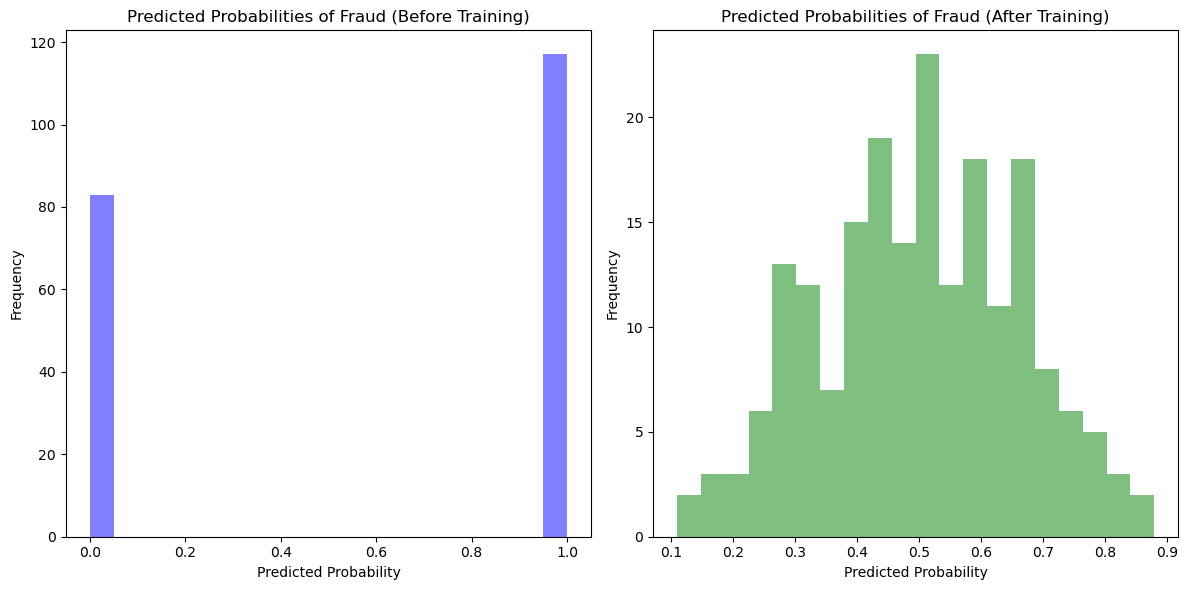

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Generate synthetic dataset
np.random.seed(42)

# Features: age, income, transaction_amount
n_samples = 1000
age = np.random.normal(40, 10, n_samples)
income = np.random.normal(50000, 10000, n_samples)
transaction_amount = np.random.normal(100, 20, n_samples)

# Target: fraud (binary: 0 = no, 1 = yes)
fraud = np.random.randint(2, size=n_samples)

# Create DataFrame
data = pd.DataFrame({
    'age': age,
    'income': income,
    'transaction_amount': transaction_amount,
    'fraud': fraud
})

# Features and target variable
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions before training (using single estimator)
rf_classifier.n_estimators = 1
rf_classifier.fit(X_train, y_train)
y_pred_before = rf_classifier.predict_proba(X_test)[:, 1]

# Reset to full number of estimators
rf_classifier.n_estimators = 100
rf_classifier.fit(X_train, y_train)

# Predictions after training
y_pred_after = rf_classifier.predict_proba(X_test)[:, 1]

# Plot before and after predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_pred_before, bins=20, color='b', alpha=0.5)
plt.title('Predicted Probabilities of Fraud (Before Training)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_pred_after, bins=20, color='g', alpha=0.5)
plt.title('Predicted Probabilities of Fraud (After Training)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
